In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ##ploting and visual
import scipy.stats as stat
import numpy as np
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

import datetime

%matplotlib inline
from scipy import stats
from sklearn.metrics.pairwise import linear_kernel # for cosine similarity
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hopehodges/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
df= pd.read_csv("games.csv")


In [55]:
df.info


<bound method DataFrame.info of                                              name        platform  \
0            The Legend of Zelda: Ocarina of Time     Nintendo 64   
1                        Tony Hawk's Pro Skater 2     PlayStation   
2                             Grand Theft Auto IV   PlayStation 3   
3                                     SoulCalibur       Dreamcast   
4                             Grand Theft Auto IV        Xbox 360   
...                                           ...             ...   
18795                    Fast & Furious: Showdown        Xbox 360   
18796                     Drake of the 99 Dragons            Xbox   
18797  Afro Samurai 2: Revenge of Kuma Volume One   PlayStation 4   
18798   Infestation: Survivor Stories (The War Z)              PC   
18799         Leisure Suit Larry: Box Office Bust              PC   

             release_date                                            summary  \
0       November 23, 1998  As a young boy, Link is tricked 

In [ ]:
##Cleaning up data

In [ ]:
df.drop_duplicates('name',keep='first', inplace=True)

df.reset_index(drop=True, inplace=True)


In [ ]:
#Getting rid of punctuation and making everything lowercase

In [11]:
df.rename(columns={'summary': 's'}, inplace=True)
df['s']=df['s'].str.lower()
df['s'] = df['s'].str.replace(r'[^\w\s]+', '')
print(df['s'])


/var/folders/l8/z5jtbjgx7xg8pwl0g1mdd2fh0000gn/T/ipykernel_3826/3941936916.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['s'] = df['s'].str.replace(r'[^\w\s]+', '')


0        as a young boy link is tricked by ganondorf th...
1        as most major publishers development efforts s...
2        metacritics 2008 ps3 game of the year also kno...
3        this is a tale of souls and swords transcendin...
4        metacritics 2007 wii game of the year the ulti...
                               ...                        
12249    join natalie dylan and alex for an intense adv...
12250    fast  furious showdown takes some of the franc...
12251    drake is out for revenge in a supernatural hon...
12252    head out on a journey of redemption driven by ...
12253    formerly known as the war z it has been 5 year...
Name: s, Length: 12254, dtype: object


In [12]:
null_rows = df[df['s'].isnull()].index

df.drop(index=null_rows, inplace=True)


In [13]:
#Getting rid of stopwords 

In [ ]:
#Do word clouds , content based and collab base, topic 


In [15]:
stop_words = stopwords.words('english')
df['s'] = df['s'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
print(df['s'])

0        young boy link tricked ganondorf king gerudo t...
1        major publishers development efforts shift num...
2        metacritics 2008 ps3 game year also known gta ...
3        tale souls swords transcending world history t...
4        metacritics 2007 wii game year ultimate ninten...
                               ...                        
12249    join natalie dylan alex intense adventure base...
12250    fast furious showdown takes franchises iconic ...
12251    drake revenge supernatural hong kong world you...
12252    head journey redemption driven bittersweet rev...
12253    formerly known war z 5 years since outbreak gi...
Name: s, Length: 12153, dtype: object


In [16]:
Df2 = df.drop(df[df['user_review'] == 'tbd'].index)


In [17]:
##Turning my objects into floats 

In [18]:
Df2["user_review"] = Df2["user_review"].astype(str).astype(float)


In [19]:
Df2["meta_score"] = Df2["meta_score"].astype(str).astype(float)


In [20]:
Df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11182 entries, 0 to 12253
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          11182 non-null  object 
 1   platform      11182 non-null  object 
 2   release_date  11182 non-null  object 
 3   s             11182 non-null  object 
 4   meta_score    11182 non-null  float64
 5   user_review   11182 non-null  float64
dtypes: float64(2), object(4)
memory usage: 611.5+ KB


In [21]:
Df2.describe()


,meta_score,user_review
count,11182.000000,11182.000000
mean,71.356108,7.070399
std,12.453150,1.336268
min,20.000000,0.500000
25%,65.000000,6.400000
50%,73.000000,7.400000
75%,80.000000,8.000000
max,99.000000,9.700000


In [22]:
##Getting rid of Dreamcast and Playstation Vita since they are both considered failed consoles 


In [50]:
Df3 = Df2[~Df2.platform.str.contains("Dreamcast")]


In [51]:
Df4 = Df3[~Df3.platform.str.contains("PlayStation Vita")]


In [26]:
##Getting rid of games with a 65 or lower 


In [27]:
condition = Df4['meta_score'] > 65


In [28]:
true_index = condition[condition == True].index


In [29]:
Df5 = Df4[condition]


In [30]:
Df5


,name,platform,release_date,s,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",young boy link tricked ganondorf king gerudo t...,99.0,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",major publishers development efforts shift num...,98.0,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",metacritics 2008 ps3 game year also known gta ...,98.0,7.7
4,Super Mario Galaxy,Wii,"November 12, 2007",metacritics 2007 wii game year ultimate ninten...,97.0,9.1
5,Super Mario Galaxy 2,Wii,"May 23, 2010",super mario galaxy 2 sequel galaxyhopping orig...,97.0,9.1
...,...,...,...,...,...,...
8688,AirForce Delta Strike,PlayStation 2,"February 3, 2004",also known airforce delta blue wing knights st...,66.0,7.0
8689,American Conquest: Fight Back,PC,"September 29, 2003",three centuries war continue even frantic comb...,66.0,8.1
8690,Tomb Raider: The Prophecy,Game Boy Advance,"November 12, 2002",tomb raider prophecy delivers full tomb raider...,66.0,8.3
8691,Home Run King,GameCube,"March 18, 2002",first pitch opening day final world series hom...,66.0,7.5


In [31]:
Df5.shape

(7951, 6)

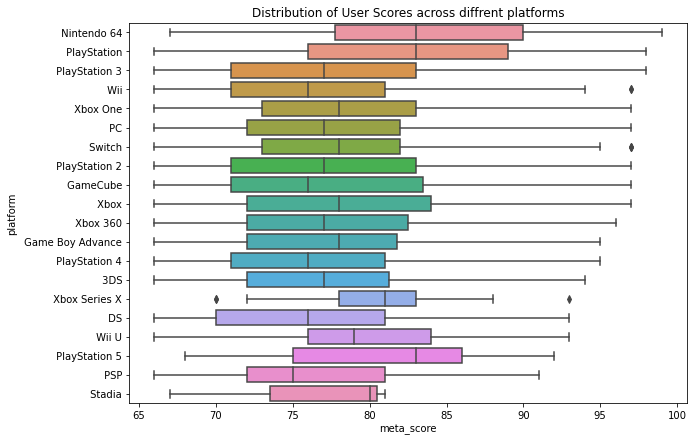

In [59]:
plt.figure(figsize=(10,7))
sns.boxplot(x='meta_score',y='platform',data=Df5)
T = plt.title("Distribution of User Scores across diffrent platforms")

In [36]:
gpc = Df5['platform'].value_counts().reset_index()
gpc.columns = ['platform', 'count']
gpc

,platform,count
0,PC,2587
1,PlayStation 4,698
2,Switch,592
3,Xbox 360,583
4,PlayStation 2,556
5,Xbox One,469
6,PlayStation 3,464
7,DS,326
8,Xbox,270
9,Wii,264


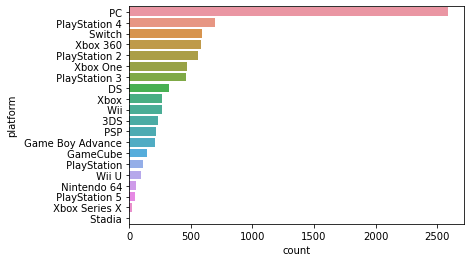

In [37]:
sns.barplot(x = 'count',y = 'platform', data = gpc);

In [62]:
Df5.reset_index(drop=True, inplace=True)

Df5.index

RangeIndex(start=0, stop=7951, step=1)

In [66]:
#First I did TF-IDF Vectorizer
tfidf = TfidfVectorizer()

#Created the matrix
tfidf_matrix = tfidf.fit_transform([str(i) for i in Df5['s']])

#Output the shape of matrix
tfidf_matrix.shape

(7951, 35249)

In [92]:
#tfidf.get_feature_names()[1500:1550]

In [93]:
cosine = linear_kernel(tfidf_matrix, tfidf_matrix)

cosine

array([[1.        , 0.        , 0.02281944, ..., 0.        , 0.02704591,
        0.00708825],
       [0.        , 1.        , 0.007985  , ..., 0.        , 0.05278461,
        0.        ],
       [0.02281944, 0.007985  , 1.        , ..., 0.        , 0.01035871,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.02704591, 0.05278461, 0.01035871, ..., 0.        , 1.        ,
        0.        ],
       [0.00708825, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [71]:
# reverse the indices and video game titles

indices = pd.Series(Df5.index, index=Df5['name'])

indices

name
The Legend of Zelda: Ocarina of Time       0
Tony Hawk's Pro Skater 2                   1
Grand Theft Auto IV                        2
Super Mario Galaxy                         3
Super Mario Galaxy 2                       4
                                        ... 
AirForce Delta Strike                   7946
American Conquest: Fight Back           7947
Tomb Raider: The Prophecy               7948
Home Run King                           7949
Disney's The Emperor's New Groove       7950
Length: 7951, dtype: int64

In [94]:
def recommender_system(title, cosine=cosine):
    
    # get index of video game that matches title
    
    index = indices[title]
    
    # get pairwise similarity scores of all video games with the given title
    
    sim_scores = list(enumerate(cosine[index]))
    
    # sort games based on similarity scores
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # get scores of 10 most similar video games
    
    sim_scores = sim_scores[1:11]
    
    # get game indices
    
    game_indices = [i[0] for i in sim_scores]
    
    # return top 10 most similar video games
    
    recs = Df5['name'].iloc[game_indices]
    
    return recs

In [95]:
recommender_system('Grand Theft Auto V')

2843                        Grand Theft Auto Online
31                     Grand Theft Auto Double Pack
601          Grand Theft Auto: Liberty City Stories
7280                               Grand Theft Auto
89                 Grand Theft Auto: Chinatown Wars
300        Grand Theft Auto IV: The Lost and Damned
5202           Oceanhorn: Monster of Uncharted Seas
6059                                   Auto Assault
2165         Clubhouse Games: 51 Worldwide Classics
434     Grand Theft Auto IV: The Ballad of Gay Tony
Name: name, dtype: object

In [76]:
recommender_system('Super Mario Galaxy')

2100                              Mario Kart Wii
735                    New Super Mario Bros. Wii
99                          Super Mario 3D World
7049                        Mario Super Sluggers
2030                    Super Mario 3D All-Stars
156     Super Mario World: Super Mario Advance 2
914                                  Punch-Out!!
2694                           Wii Sports Resort
3729                       Wario Land: Shake It!
4380                    Mario & Luigi: Paper Jam
Name: name, dtype: object

In [88]:
recommender_system('Far Cry 6')

2139       Far Cry 3: Blood Dragon
6359            Dreamfall Chapters
1950                          RiME
275                      Far Cry 3
2674                   Dead Island
2434             Yoshi's Island DS
4525     Paper Mario: Color Splash
3646    Far Cry Instincts Predator
5039                          XIII
590                      Deathloop
Name: name, dtype: object

In [96]:
recommender_system("Far Cry 5")

4742                                     Far Cry New Dawn
3907                  Baldur's Gate: Siege of Dragonspear
3422                      Baldur's Gate: Enhanced Edition
3646                           Far Cry Instincts Predator
2552    Baldur's Gate and Baldur's Gate II: Enhanced E...
685                          Baldur's Gate: Dark Alliance
2139                              Far Cry 3: Blood Dragon
5405                                        Project Spark
6076                         Far Cry 5: Hours of Darkness
745                                          Icewind Dale
Name: name, dtype: object